In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import dcd as util

In [4]:
import ee
ee.Authenticate() 
ee.Initialize()


Successfully saved authorization token.


In [38]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/CDL/California_Counties.geojson')
dataframe = dataframe.to_crs(epsg=4326)
dataframe

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,Shape__Area,Shape__Length,geometry
0,1,Alameda County,California,06,001,06001,3.084661e+09,4.484258e+05,"MULTIPOLYGON (((-122.19112 37.69298, -122.1910..."
1,2,Alpine County,California,06,003,06003,3.156006e+09,2.755651e+05,"POLYGON ((-119.90061 38.93077, -119.88726 38.9..."
2,3,Amador County,California,06,005,06005,2.562531e+09,3.595932e+05,"POLYGON ((-120.07765 38.70889, -120.07771 38.7..."
3,4,Butte County,California,06,007,06007,7.340033e+09,5.259746e+05,"POLYGON ((-121.40463 40.14665, -121.40489 40.1..."
4,5,Calaveras County,California,06,009,06009,4.356209e+09,3.670057e+05,"POLYGON ((-120.07247 38.50916, -120.07254 38.4..."
5,6,Colusa County,California,06,011,06011,4.990775e+09,3.860411e+05,"POLYGON ((-122.10655 39.41443, -122.10278 39.4..."
6,7,Contra Costa County,California,06,013,06013,3.075717e+09,4.515488e+05,"MULTIPOLYGON (((-122.37203 37.90142, -122.3717..."
7,8,Del Norte County,California,06,015,06015,4.715185e+09,4.214900e+05,"MULTIPOLYGON (((-124.11103 41.59347, -124.1112..."
8,9,El Dorado County,California,06,017,06017,7.624185e+09,4.677944e+05,"POLYGON ((-119.90433 38.93333, -119.90442 38.9..."
9,10,Fresno County,California,06,019,06019,2.430318e+10,1.104287e+06,"POLYGON ((-119.00148 37.57090, -119.00097 37.5..."


### Landsat

In [8]:
# parent_folder = "/data2/hkaman/Data/FoundationModel/Monteray/ET"
# import os
# # Generate subfolders for years 1985 to 2024
# for year in range(2008, 2025):
#     year_folder = os.path.join(parent_folder, str(year))
#     os.makedirs(year_folder, exist_ok=True)

In [6]:
for year in range(1989, 2008):
    util.DownloadSatelliteImgEE(year = year,                  
                                cloud_filter= 5, 
                                satellite = 'Landsat')()

Export task Monterey_image_0 started.


In [ ]:
for year in range(2001, 2025):
    folder_path = f'/data2/hkaman/Data/FoundationModel/Monteray/{year}'
    util.extract_all_zip_files(folder_path)

In [ ]:
for year in range(1985, 2025):
    folder_path = f'/data2/hkaman/Data/FoundationModel/Monteray/{year}/'
    # util.rename_tif_files(folder_path)
    util.remove_small_tif_files(folder_path, size_threshold_mb=200)

image name: Monterey_LT_20241203.tif


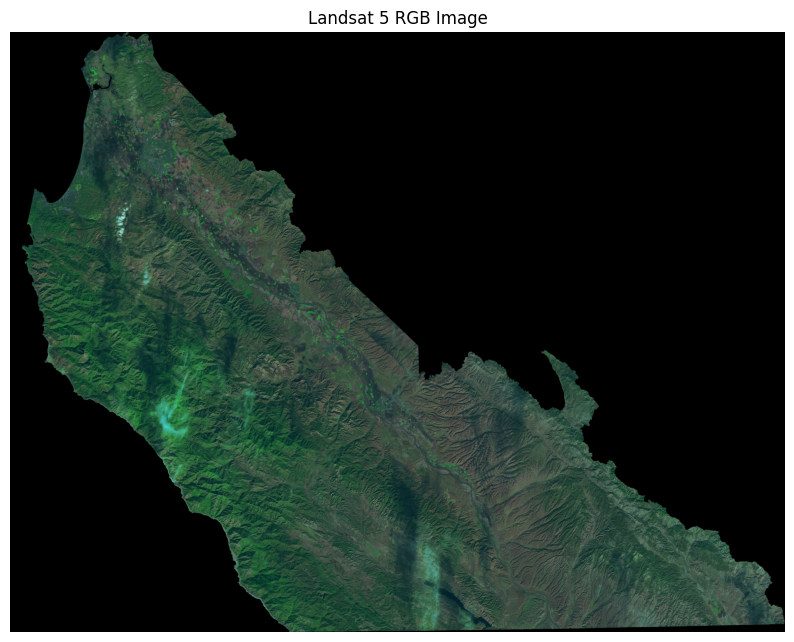

In [217]:
folder_path = f'/data2/hkaman/Data/FoundationModel/Monteray/Landsat/processed/{2008}/' 
util.plot_landsat5_rgb_by_index(folder_path, 7)

Original shape: (4143, 5349)
Original CRS: EPSG:32610
Reprojected shape: (4259, 5421)
Reprojected CRS: EPSG:3857


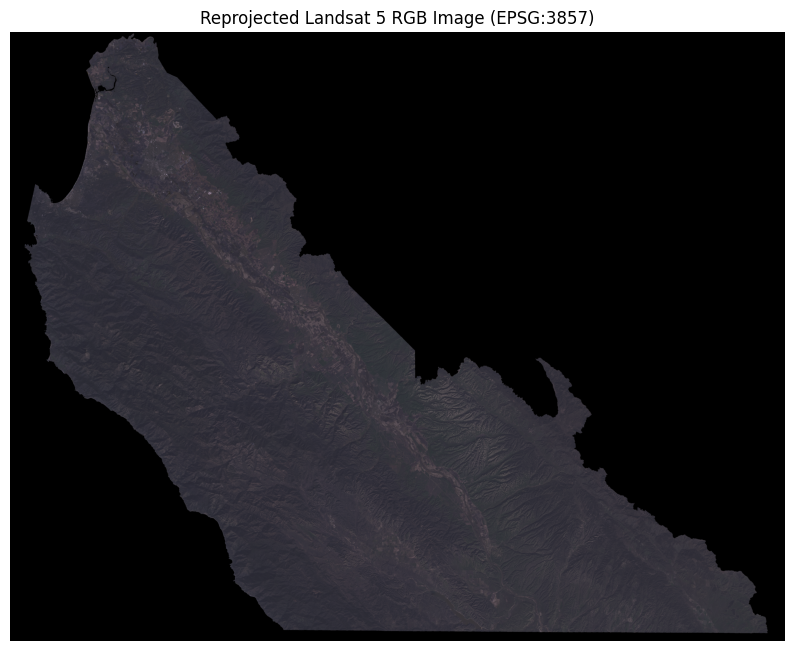

In [25]:
folder_path = f'/data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2023/processed_Monterey_LT_20230131.tif' 
util.plot_landsat5_rgb(folder_path)

In [24]:
import rasterio
folder_path = f'/data2/hkaman/Data/FoundationModel/Monterey/Landsat/processed/2023/processed_Monterey_LT_20230131.tif' 
def get_band_sizes(tif_file_path):
    with rasterio.open(tif_file_path) as src:
        band_sizes = {}
        for i in range(1, src.count + 1):  # `src.count` gives the number of bands
            band_sizes[f"Band {i}"] = (src.width, src.height)  # width and height for each band
        return band_sizes

# Example usage
# tif_file_path = "path/to/your/landsat_file.tif"
band_sizes = get_band_sizes(folder_path)

# Print sizes
for band, size in band_sizes.items():
    print(f"{band}: Width = {size[0]}, Height = {size[1]}")

Band 1: Width = 5349, Height = 4143
Band 2: Width = 5349, Height = 4143
Band 3: Width = 5349, Height = 4143
Band 4: Width = 5349, Height = 4143
Band 5: Width = 5349, Height = 4143
Band 6: Width = 5349, Height = 4143


In [27]:
parent_path = f'/data2/hkaman/Data/FoundationModel/Monterey/Landsat'
count_df = util.count_observations_by_month(parent_path)
count_df

CSV file saved at: /data2/hkaman/Data/FoundationModel/Monterey/Landsat/observations_per_month.csv


,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2008,0,1,1,1,1,1,1,1,1,1,0,0
2009,1,1,1,1,1,1,1,1,1,1,1,0
2010,0,0,1,1,1,1,1,1,1,1,1,0
2011,0,0,1,1,1,1,1,1,1,1,1,0
2013,0,0,0,0,1,1,1,1,1,1,1,1
2014,1,1,0,1,1,1,1,1,1,1,1,0
2015,1,1,1,1,1,1,1,0,1,1,0,0
2016,1,1,1,1,1,1,1,1,1,1,0,1
2017,1,0,1,1,1,1,1,1,1,1,1,1
